<a href="https://colab.research.google.com/github/leandrobarbieri/ml-basics/blob/master/Predict_rocket_launch_delays_with_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### Predict rocket launch delays with machine learning
 #### É provável que ocorra um lançamento dadas as condições meteorológicas específicas?
https://docs.microsoft.com/en-us/learn/paths/machine-learning-predict-launch-delay-nasa/

---



#### Importando as bibliotecas

In [ ]:
# Pandas library is used for handling tabular data
import pandas as pd

# NumPy is used for handling numerical series operations (addition, multiplication, and ...)

import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing

# for visualizing the tree
import pydotplus
from IPython.display import Image 

In [ ]:
dados = pd.read_excel("https://nasadata.blob.core.windows.net/rocketlaunches/RocketLaunchDataCompleted.xlsx")
dados.head(3)

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,75.0,55.0,65.0,0.0,0.08,E,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,75.0,55.0,65.0,0.0,0.09,E,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.0,0.09,NE,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN


### Exploração de dados




In [ ]:
dados.info()

# Estes campos não possuem dados, as colunas precisam ser tratadas
# Hist Ave Max Wind Speed
# Hist Ave Visibility
# Hist Ave Sea Level Pressure
# Existe um registro apenas com a data e location

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

### Observações:
__Foram analisados 300 dias, porém apenas 60 tiveram lançamentos.__
- Os campos: Name, Time (East Coast), Crewed or Uncrewed, Launched?, Temp at Launch Time, Wind Speed at Launch Time somente estão preenchidos para os dias de lançamento

In [ ]:
# dados["Name"].value_counts()
dados["Condition"].value_counts()
# dados["Wind Speed at Launch Time"].value_counts()
# dados["Visibility"].value_counts()

Cloudy            113
Fair               68
Partly Cloudy      68
Rain               24
T-Storm            12
Thunder             7
Mostly Cloudy       2
Windy               1
Light Rain          1
Heavy T-Storm       1
Partly Cloudly      1
Name: Condition, dtype: int64

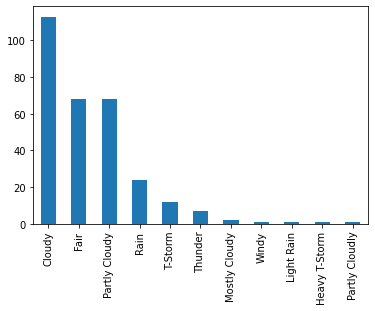

In [ ]:
dados["Condition"].value_counts().plot.bar()

### Limpeza dos dados
- subistituir valores none
- tratar os valores nulos
- padronizar as categorinas das colunas, transformar e numeros

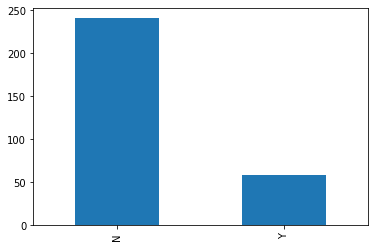

In [ ]:
# Linhas que que não possuem valores em "Launched?" preencher com o valor "N"
dados["Launched?"].fillna("N", inplace=True)
dados["Launched?"].value_counts().plot.bar()

In [ ]:
# Valores em NaN da coluna "Crewed or Uncrewed", considerar como "Uncrewed"
dados["Crewed or Uncrewed"].fillna("Uncrewed", inplace=True)
dados["Crewed or Uncrewed"].value_counts()

Uncrewed    284
Crewed       16
Name: Crewed or Uncrewed, dtype: int64

In [ ]:
# Para valores NaN em "Wind Direction", considerar "unknown"
dados["Wind Direction"].fillna("unknown", inplace=True)
dados["Wind Direction"].value_counts()

E          80
W          54
NE         42
SE         38
S          28
NW         25
N          19
SW         13
unknown     1
Name: Wind Direction, dtype: int64

In [ ]:
# Para valores NaN em "Condition", considerar "fair" (razoavel)
dados["Condition"].fillna("Fair", inplace=True)
dados["Condition"].value_counts()

Cloudy            113
Fair               70
Partly Cloudy      68
Rain               24
T-Storm            12
Thunder             7
Mostly Cloudy       2
Windy               1
Light Rain          1
Heavy T-Storm       1
Partly Cloudly      1
Name: Condition, dtype: int64

In [ ]:
# Todos os outros valores NaN converter para Sero
dados.fillna(0, inplace=True)

In [ ]:
# dados.head(50)

# Lançamentos
dados[dados.loc[:, "Launched?"] == "Y"].head(3)

# Lançamentos tripulados
# dados[dados.loc[:, "Crewed or Uncrewed"] == "Crewed"]

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.0,0.09,NE,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
7,Pioneer 4,1959-03-03,13:10:00,Cape Canaveral,Uncrewed,Y,78.0,0.0,69.65,78.0,75.0,54.0,64.0,0.0,0.10,SE,20.0,7.0,12.0,0.0,0.0,30.13,0.0,11:38:00,Cloudy,0
12,Ranger 1,1961-08-23,11:04:00,Cape Canaveral,Uncrewed,Y,91.0,80.0,85.35,90.0,90.0,73.0,82.0,0.0,0.24,SE,20.0,10.0,9.0,0.0,0.0,30.03,0.0,12:56:00,Partly Cloudy,0


In [ ]:
# Dados alterados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          300 non-null    object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             300 non-null    object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            300 non-null    object        
 5   Launched?                     300 non-null    object        
 6   High Temp                     300 non-null    float64       
 7   Low Temp                      300 non-null    float64       
 8   Ave Temp                      300 non-null    float64       
 9   Temp at Launch Time           300 non-null    float64       
 10  Hist High Temp                300 non-null    float64       
 11  Hist Low Temp                 30

### Transformação
- Transformando dados categoricos de texto para números

In [ ]:
encoder = preprocessing.LabelEncoder()
dados["Crewed or Uncrewed2"] = encoder.fit_transform(dados["Crewed or Uncrewed"])
dados['Wind Direction'] = encoder.fit_transform(dados['Wind Direction'])
dados['Condition'] = encoder.fit_transform(dados['Condition'])

In [ ]:
dados.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes,Crewed or Uncrewed2
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,75.0,55.0,65.0,0.0,0.08,0,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,0,0,1
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,75.0,55.0,65.0,0.0,0.09,0,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,0,0,1
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.0,0.09,2,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,0,0,1
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,75.0,55.0,65.0,0.0,0.08,1,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,6,0,1
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,75.0,55.0,65.0,0.0,0.09,0,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,6,0,1
